Text to ML

## Import libraries
To install libraries in Python, you can use a package manager like pip, which comes pre-installed with most Python distributions.



In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
eeg_data = pd.read_csv("/content/drive/MyDrive/Book_Signal_processing/ML/Dataset/Converted_data.csv")
display(eeg_data.head())


,file_num,sample_num,subje0t_identifier,AF1,AF2,AF7,AF8,AFZ,C1,C2,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
0,1,0,1,-6.083,-7.640,-0.682,6.460,-4.710,7.762,-0.773,...,-7.090,-0.600,2.391,-7.741,-8.921,-1.862,1.760,-2.441,-5.341,-3.560
1,1,1,1,-4.618,-9.593,0.295,2.065,-3.733,-7.375,-0.285,...,1.211,-0.112,1.414,-6.276,-7.456,-3.326,1.272,-4.395,-5.341,-4.537
2,1,2,1,-2.177,-7.151,-1.170,-5.259,-1.292,-2.981,1.180,...,4.140,-0.600,-0.051,-2.370,-4.527,-2.838,-0.682,-4.883,-4.364,-5.025
3,1,3,1,1.241,0.173,-3.611,-8.189,1.638,2.391,1.668,...,12.441,-1.577,-1.027,1.048,-2.574,-1.862,-2.635,-2.441,-3.876,-3.560
4,1,4,1,2.706,8.962,-5.564,-4.283,4.079,2.391,1.180,...,-1.231,-2.553,-1.516,0.071,-3.062,-0.885,-3.611,0.488,-3.876,-0.631


**Shuffle** the data

In [ ]:
import pandas as pd
import numpy as np

# Example DataFrame
data = eeg_data
eeg_data = pd.DataFrame(data)

# Shuffle the DataFrame by 'file_num'
# Step 1: Get unique file_nums and shuffle them
unique_file_nums = eeg_data['file_num'].unique()
np.random.shuffle(unique_file_nums)

# Step 2: Reorder the DataFrame based on the shuffled file_nums
shuffled_data = pd.concat([eeg_data[eeg_data['file_num'] == file_num] for file_num in unique_file_nums])

# Reset the index (optional)
shuffled_data.reset_index(drop=True, inplace=True)

print(shuffled_data)

        file_num  sample_num  subje0t_identifier     AF1     AF2     AF7  \
0             99           0                   1   9.054  10.742  10.183   
1             99           1                   1   5.636   6.836   6.276   
2             99           2                   1   2.218   2.930   2.858   
3             99           3                   1   0.264   0.000   0.905   
4             99           4                   1  -1.689  -1.465  -2.024   
...          ...         ...                 ...     ...     ...     ...   
122875       257         251                   0 -13.519 -12.583 -14.343   
122876       257         252                   0 -12.054 -14.537  -7.019   
122877       257         253                   0  -8.636 -13.560   0.793   
122878       257         254                   0  -4.242 -11.119   6.165   
122879       257         255                   0  -1.312  -7.701   8.118   

           AF8     AFZ     C1     C2  ...     PO8     POZ      PZ      T7  \
0       12

In [ ]:
from google.colab import files

# Convert the DataFrame to CSV
shuffled_data.to_csv('shuffled_data.csv', index=False)

# Download the file
files.download('shuffled_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Only EEG

In [ ]:
eeg_data_final = shuffled_data.iloc[:, 3:]
display(eeg_data_final.head())

status_y = shuffled_data["subje0t_identifier"]
display(status_y.head())


,AF1,AF2,AF7,AF8,AFZ,C1,C2,C3,C4,C5,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
0,9.054,10.742,10.183,12.828,8.575,1.424,4.517,5.239,11.027,11.332,...,7.324,7.833,4.415,14.608,20.711,15.055,17.395,15.930,15.727,9.125
1,5.636,6.836,6.276,7.945,5.157,1.912,3.052,5.727,7.121,9.379,...,2.441,5.880,4.903,11.190,14.364,12.614,11.536,9.583,11.820,5.707
2,2.218,2.930,2.858,3.550,1.740,1.912,2.075,4.751,4.679,6.449,...,-1.953,4.903,5.880,7.284,8.016,8.219,5.676,3.723,6.938,2.777
3,0.264,0.000,0.905,0.132,-0.702,1.912,1.099,3.286,2.726,3.031,...,-3.906,3.927,7.345,2.889,2.645,3.825,2.258,0.793,2.055,0.336
4,-1.689,-1.465,-2.024,-2.309,-2.167,1.912,0.122,1.821,1.261,0.590,...,-2.930,4.415,8.809,-1.017,-0.773,-0.081,0.305,-1.160,-2.340,-1.129


,subje0t_identifier
0,1
1,1
2,1
3,1
4,1


## Libraries for Visualisation

The simplest libraries for data visualization are Matplotlib and Seaborn. These general-purpose Python libraries are also frequently used for creating custom visualizations of EEG data due to their flexibility and ease of use.   
For the most part, we will use the Matplotlib library, its main advantage over Seaborn is its ability to work in real-time.

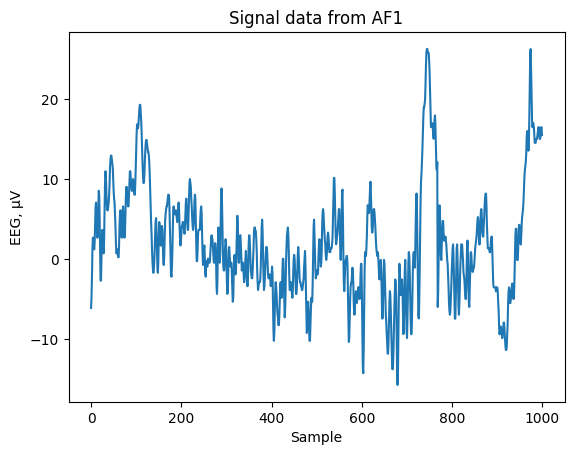

In [ ]:
# select the data from the first channel for demo
channel = "AF1"
channel_data = eeg_data[channel]

# plot the EEG data
plt.plot(channel_data[0:1000])
plt.title("Signal data from "+channel)
plt.ylabel('EEG, µV')
plt.xlabel('Sample')
plt.show()

**Signal Noise Ration**

(122880, 64)


Text(0.5, 1.0, 'Signal-to-Noise Ratio (SNR) for Each EEG Channel')

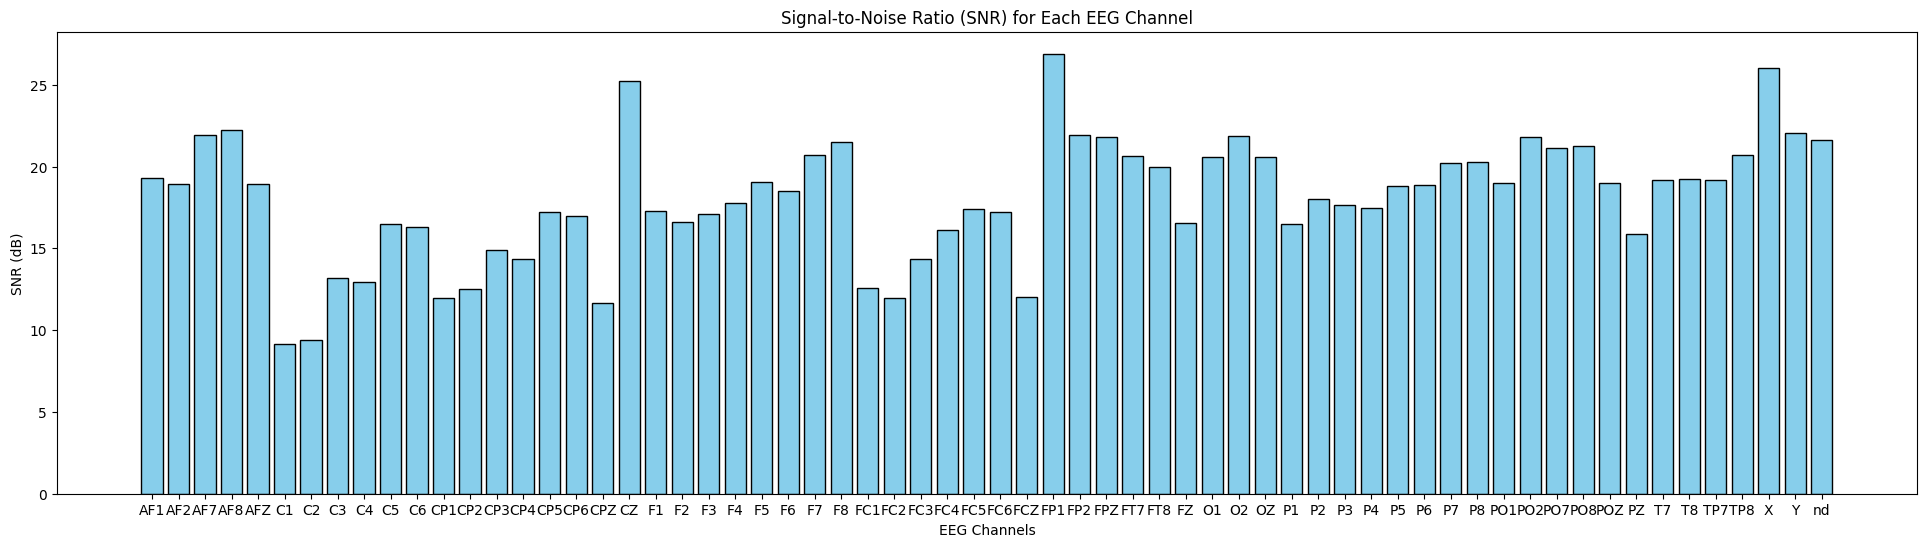

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming eeg_data_final is already loaded as a DataFrame
print(eeg_data_final.shape)

# Define a scalar noise power
P_noise = 1  # Assuming unit noise power

# Compute SNR for each column
SNR_values = {}
for column in eeg_data_final.columns:
    channel_data = eeg_data_final[column]
    P_signal = np.mean(channel_data**2)  # Power of the signal
    SNR_values[column] = 10 * np.log10(P_signal / P_noise)  # SNR calculation

# Convert to a DataFrame
SNR_df = pd.DataFrame.from_dict(SNR_values, orient='index', columns=['SNR (dB)'])

# Plot the SNR values
plt.figure(figsize=(24, 6))
plt.bar(SNR_df.index, SNR_df['SNR (dB)'], color='skyblue', edgecolor='black')

# Formatting the plot
plt.xlabel("EEG Channels")
plt.ylabel("SNR (dB)")
plt.title("Signal-to-Noise Ratio (SNR) for Each EEG Channel")


**Preprocessing EEG data**
 Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# create the RFE model and select 3 attributes

x = eeg_data_final
y = status_y

rfe = RFE(estimator=model, n_features_to_select=30)
print (y[:100])
rfe = rfe.fit(x[:1000], y[:1000])


# Get the feature ranking
feature_ranking = rfe.ranking_

# Get the column names of your original dataset
feature_names = x.columns

# Create a list of selected features
selected_features = [feature for feature, rank in zip(feature_names, feature_ranking) if rank == 1]

# Print the selected features
print("Selected channels:")
for feature in selected_features:
    print(feature)




0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: subje0t_identifier, Length: 100, dtype: int64
Selected channels:
AF1
AF2
C1
C3
C4
C6
CP1
CP2
CP3
CP5
F6
F7
FC3
FC6
FP1
FP2
FPZ
FT8
FZ
O2
P1
P2
P4
P6
P7
P8
POZ
PZ
T7
nd


In [ ]:
# Get the feature ranking
feature_ranking = rfe.ranking_

# Get the column names of your original dataset
feature_names = x.columns

# Create a list of tuples containing (channel, rank)
channel_rankings = list(zip(feature_names, feature_ranking))

# Sort the list by rank (ascending order)
channel_rankings.sort(key=lambda x: x[1])

# Print the channels with their rankings
print("Channel rankings (lower rank indicates higher importance):")
for channel, rank in channel_rankings:
    print(f"{channel}: {rank}")

Channel rankings (lower rank indicates higher importance):
AF1: 1
AF2: 1
C1: 1
C3: 1
C4: 1
C6: 1
CP1: 1
CP2: 1
CP3: 1
CP5: 1
F6: 1
F7: 1
FC3: 1
FC6: 1
FP1: 1
FP2: 1
FPZ: 1
FT8: 1
FZ: 1
O2: 1
P1: 1
P2: 1
P4: 1
P6: 1
P7: 1
P8: 1
POZ: 1
PZ: 1
T7: 1
nd: 1
PO7: 2
AFZ: 3
CPZ: 4
P3: 5
AF7: 6
C5: 7
CZ: 8
F2: 9
AF8: 10
Y: 11
FT7: 12
FC4: 13
PO2: 14
T8: 15
TP8: 16
F1: 17
X: 18
OZ: 19
TP7: 20
CP4: 21
FC1: 22
O1: 23
PO8: 24
F8: 25
FC2: 26
F3: 27
P5: 28
FC5: 29
CP6: 30
FCZ: 31
PO1: 32
F4: 33
C2: 34
F5: 35


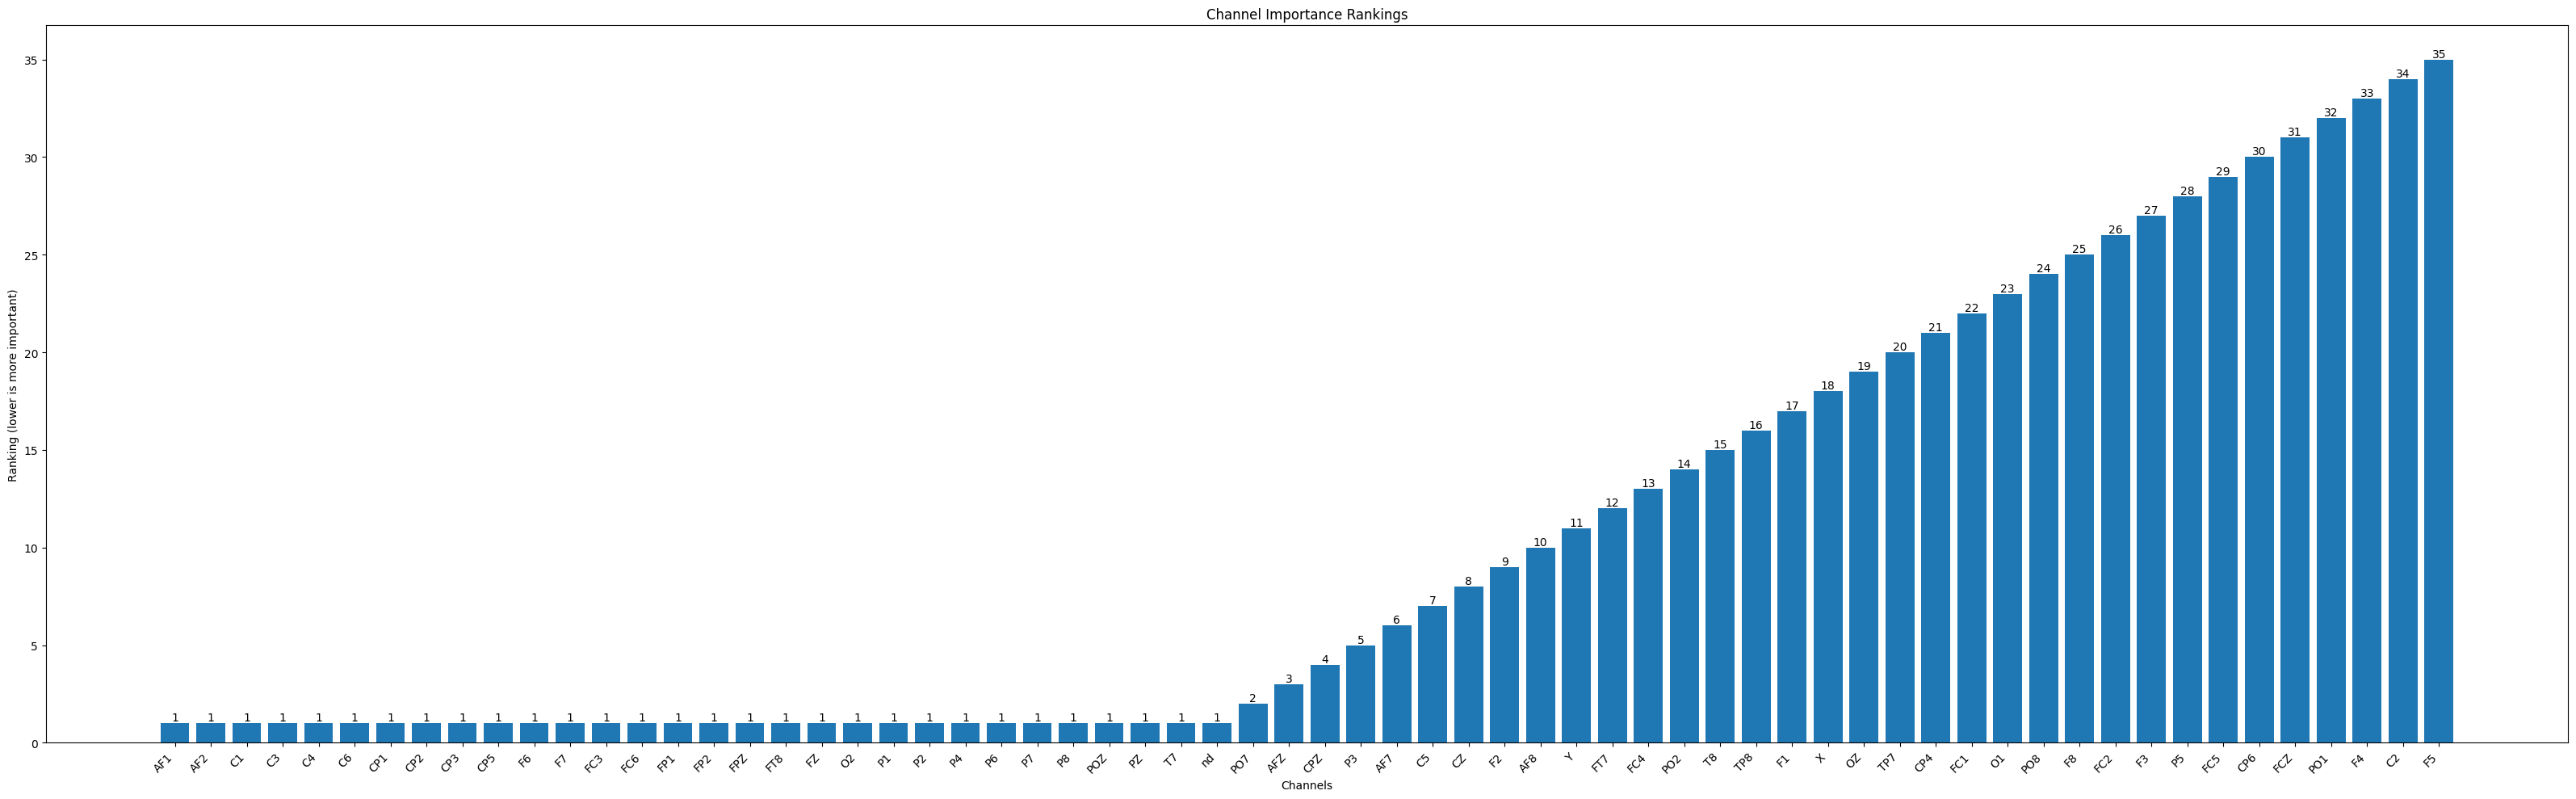

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already run the code to get channel_rankings

# Separate the channel names and rankings
channels, rankings = zip(*channel_rankings)

# Create a vertical bar chart
plt.figure(figsize=(len(channels) * 0.5, 10))  # Adjust figure size based on number of channels
plt.bar(channels, rankings)  # channels are on x-axis, rankings on y-axis

# Customize the chart
plt.title('Channel Importance Rankings')
plt.ylabel('Ranking (lower is more important)')
plt.xlabel('Channels')

# Add ranking values on top of each bar
for i, v in enumerate(rankings):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Pirson Correaltion

<class 'pandas.core.series.Series'>
['AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8', 'FZ', 'O1', 'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7', 'TP8', 'X', 'Y', 'nd']
[0.10341777967832978, 0.11341274002962323, 0.06724835046571112, 0.07040022449681516, 0.10799132661198228, 0.071278111707629, 0.07454989062615712, 0.09220540496224676, 0.06688711929347992, 0.07045931637795848, 0.05310564002553143, 0.04424353456145276, 0.03521831621429618, 0.05567244152674545, 0.025723509475660596, 0.054617280942365, 0.03551634320083008, 0.04815680914074147, 0.06001056235034881, 0.08528789231934598, 0.10120453890448652, 0.08984790805683761, 0.08917408955162073, 0.07777091497737296, 0.08686056201952784, 0.08442010318651887, 0.0351

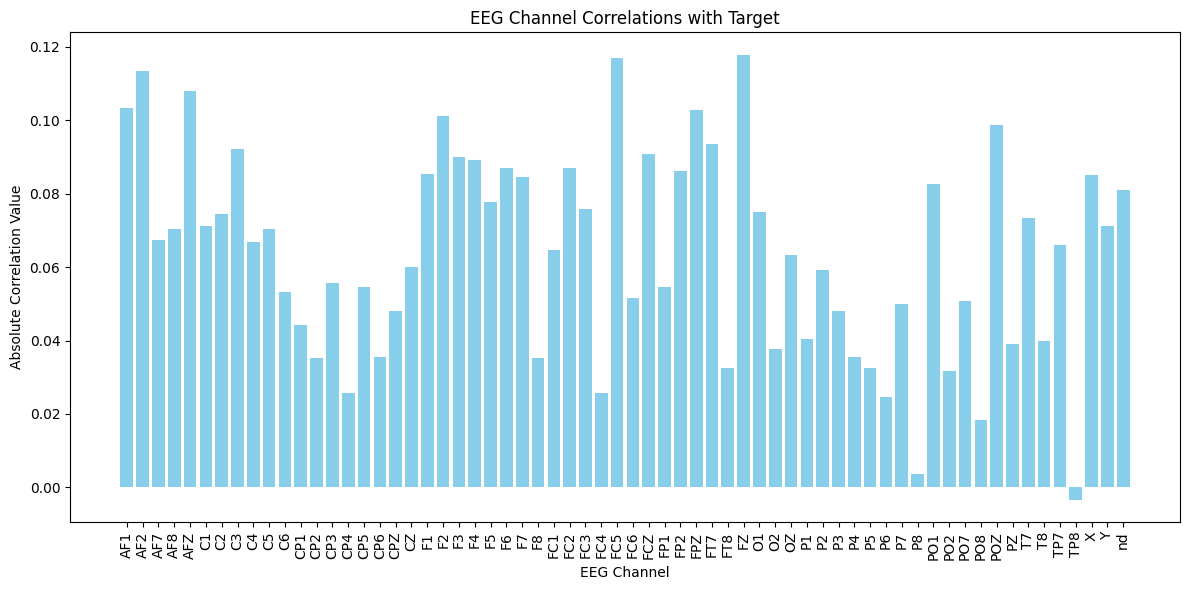

In [ ]:
import pandas as pd
import numpy as np

# Compute correlation between each feature and the target
correlations = x.corrwith(y)

# Sort features by absolute correlation value
#correlations = correlations.abs().sort_values(ascending=False)

print(type(correlations))
# Assuming you've already computed correlations as shown in your first script
# correlations = x.corrwith(y)
# correlations = correlations.abs().sort_values(ascending=False)

# Extract Channel names and Values from correlations
channels = correlations.index.tolist()
values = correlations.values.tolist()
print (channels)
print (values)
# Create DataFrame
df = pd.DataFrame({'Channel': channels, 'Value': values})

# Sort by Value (descending) for better visualization
#df = df.sort_values(by='Value', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df['Channel'], df['Value'], color='skyblue')
plt.xlabel('EEG Channel')
plt.ylabel('Absolute Correlation Value')
plt.title('EEG Channel Correlations with Target')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Feature Importance via Machine Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x[:1000], y[:1000])

# Use x.columns instead of df.columns[:-1]
feature_importances = pd.Series(rf.feature_importances_, index=x.columns)
print(feature_importances.sort_values(ascending=False))


P2     0.110195
F6     0.092751
FC2    0.088805
FC4    0.068123
FP2    0.039973
         ...   
FZ     0.003393
FC5    0.003002
P7     0.002814
CP5    0.002640
F5     0.002542
Length: 64, dtype: float64


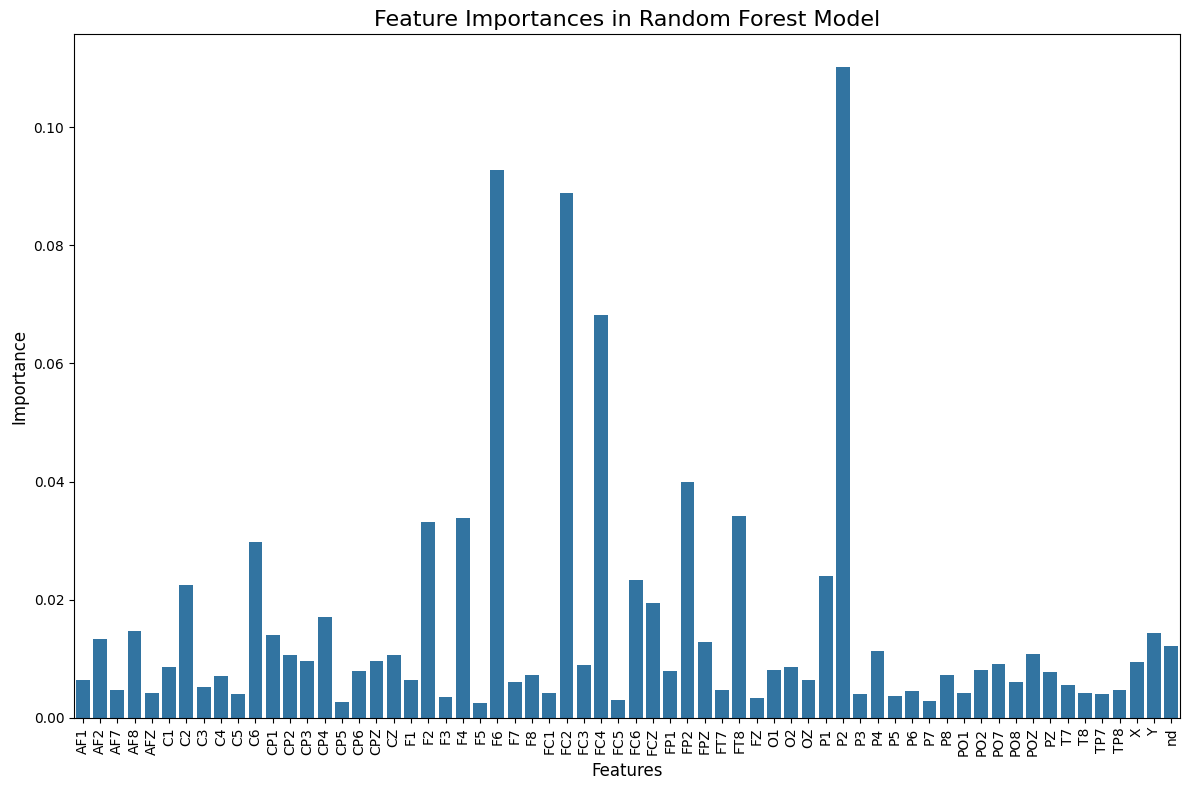

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already created the feature_importances Series as in the previous answer
feature_importances = pd.Series(rf.feature_importances_, index=x.columns)

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Create a bar plot without sorting
sns.barplot(x=feature_importances.index, y=feature_importances.values)

# Customize the plot
plt.title('Feature Importances in Random Forest Model', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


**Cap Visualsation**

Valid channel names: ['AF1', 'AF2', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'Fp1', 'Fp2', 'Fpz', 'FT7', 'FT8', 'Fz', 'O1', 'O2', 'Oz', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8', 'T3', 'T4', 'T5']
valid_channel_names 64
invalid_channel_names []
values [0.10341777967832978, 0.11341274002962323, 0.06724835046571112, 0.07040022449681516, 0.10799132661198228, 0.071278111707629, 0.07454989062615712, 0.09220540496224676, 0.06688711929347992, 0.07045931637795848, 0.05310564002553143, 0.04424353456145276, 0.03521831621429618, 0.05567244152674545, 0.025723509475660596, 0.054617280942365, 0.03551634320083008, 0.04815680914074147, 0.06001056235034881, 0.08528789231934598, 0.10120453890448652, 0.08984790805683761, 0.08917408955162073, 0.07777091497737296, 0.0868

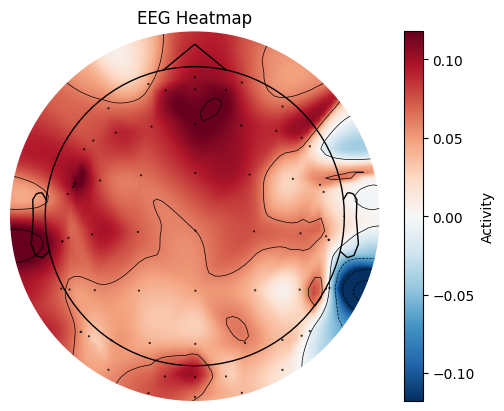

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#!pip install mne
import mne

# Define your channel names (ensure they match the montage)
channel_names = ['AF1', 'AF2', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'Fp1', 'Fp2', 'Fpz', 'FT7', 'FT8', 'Fz', 'O1', 'O2', 'Oz', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8', 'T3', 'T4', 'T5']

# Create a montage (standard electrode positions)
montage = mne.channels.make_standard_montage('standard_1020') #biosemi64

# Filter channel names to only those present in the montage
valid_channel_names = [ch for ch in channel_names if ch in montage.ch_names]

print("Valid channel names:", valid_channel_names)
print("valid_channel_names", len(valid_channel_names))

invalid_channel_names = [ch for ch in channel_names if ch not in montage.ch_names]
print("invalid_channel_names", (invalid_channel_names))

# Create random values for demonstration (replace with your actual data)
#values = np.random.rand(len(valid_channel_names))

print ("values", values)

values = np.array(values)
print (type(values))
print (values.shape)
#print (values)
# Extract positions for valid channels
positions = montage.get_positions()['ch_pos']
pos = np.array([positions[ch][:2] for ch in valid_channel_names])

# Plot the topomap (heatmap on the head)
fig, ax = plt.subplots()
im, cn = mne.viz.plot_topomap(values, pos=pos, axes=ax, show=False, cmap='RdBu_r', contours=6)
plt.title("EEG Heatmap")

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Activity')

plt.show()


Cap visualisation Alco

invalid_channel_names []
values [-0.80250269 -1.00606086 -2.512251   -4.42818041 -6.12344137 -2.45044831
 -2.67082252 -4.90246501  0.52543219  3.29335206 -0.79166967  7.17566226
 -1.79934514 -3.45215756  1.93693252 -1.19024047 -1.54915513 -3.36589266
 -3.86427156 -4.19115928 -2.68668246 -2.33653115 -2.10836559 -2.69933432
  0.81596134 -3.08452472 -2.03884873 -3.95128713 -3.36972115  0.83884571
 -1.22289064 -3.28693537 -1.81550106  0.63604347 -0.40477216  1.16993908
 -2.64201935 -0.97043328 -4.81529446 -2.49546995 -0.2931418  -1.38393069
 -2.04234863 -3.5150701   0.30616124 -2.90201034 -2.91724893 -2.47161615
  1.18968935 -1.8633464  -0.87216604 -2.91444048 -5.68748104 -6.93088172
 -7.79660788 -8.85463763 -1.61201419 -2.07511433 -0.61947698 -3.90105609
  1.92861867 -4.36055215 -0.92456896 -3.09428935]
<class 'numpy.ndarray'>
(64,)


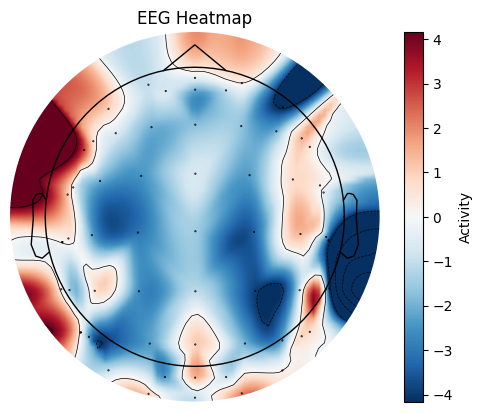

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#!pip install mne
import mne

eeg_data_alco = eeg_data.iloc[:, 3:]


eeg_data_alco = eeg_data_alco.iloc[:61442]  # Uses integer-based indexing
  # Selects all rows from index 61442 onward

# Define your channel names (ensure they match the montage)
channel_names = ['AF1', 'AF2', 'AF7', 'AF8', 'AFz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPz', 'Cz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCz', 'Fp1', 'Fp2', 'Fpz', 'FT7', 'FT8', 'Fz', 'O1', 'O2', 'Oz', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POz', 'Pz', 'T7', 'T8', 'TP7', 'TP8', 'T3', 'T4', 'T5']
# Create a montage (standard electrode positions)
montage = mne.channels.make_standard_montage('standard_1020') #biosemi64
# Filter channel names to only those present in the montage
valid_channel_names = [ch for ch in channel_names if ch in montage.ch_names]


invalid_channel_names = [ch for ch in channel_names if ch not in montage.ch_names]

print("invalid_channel_names", (invalid_channel_names))

# Create random values for demonstration (replace with your actual data)
#values = np.random.rand(len(valid_channel_names))
print ("values", values)
eeg_data_alco = np.array(eeg_data_alco)
reshaped_array = eeg_data_alco.reshape(64, -1).mean(axis=1)
values = np.array(reshaped_array)
print (type(values))
print (values.shape)
#print (values)
# Extract positions for valid channels
positions = montage.get_positions()['ch_pos']
pos = np.array([positions[ch][:2] for ch in valid_channel_names])

# Plot the topomap (heatmap on the head)
fig, ax = plt.subplots()
im, cn = mne.viz.plot_topomap(values, pos=pos, axes=ax, show=False, cmap='RdBu_r', contours=6)
plt.title("EEG Heatmap")

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Activity')
plt.show()

**Correlation Matrix**




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Assuming `df` is your DataFrame and 'target' is the target column
correlation_matrix = eeg_data_shuffled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Extract correlations with the target variable
cor_target = abs(correlation_matrix["subje0t_identifier"])
relevant_features = cor_target[cor_target > 0.5]
print(relevant_features)


NameError: name 'eeg_data_shuffled' is not defined


**Dimensionality Reduction**

In [ ]:
#copy from the course

**Hyperparameters**

Examples of hyperparameters include:
Train-test split ratio
Learning rate in optimization algorithms
Choice of optimization algorithm (e.g., gradient descent, stochastic gradient descent, or Adam optimizer)
Choice of activation function in a neural network layer (e.g., Sigmoid, ReLU, Tanh)
The choice of cost or loss function the model will use
Number of hidden layers in a neural network
Number of activation units in each layer
The drop-out rate in neural networks
Number of iterations (epochs) in training a neural network
Number of clusters in a clustering task
Kernel or filter size in convolutional layers

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x[:100], y[:100], test_size=0.2, random_state=42)

numeric_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
#Define the hyperparameter space:

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}

#Perform grid search with cross-validation:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

#Get the best model and evaluate:
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Test accuracy: {accuracy}")


Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Test accuracy: 1.0


ExtraTreeClassifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing

# Assuming eeg_data_final and status_y are already defined
x = eeg_data_final
y = status_y

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the base model
base_model = ExtraTreesClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train[:100], y_train[:100])

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Print the accuracy score
print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))


SVC - Support Vector Classification

In [ ]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# fit a SVM model to the data
model = SVC()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)
model.fit(x_train, y_train)

expected = y_test
predicted = model.predict(x_test)
print(accuracy_score(y_test, predicted))

LogisticRegression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)
model.fit(x_train, y_train)

expected = y_test
predicted = model.predict(x_test)

print(accuracy_score(y_test, predicted))

**cross-validation**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming x and y are already defined
model = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=5)  # 5-fold cross-validation

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

# If you still want to do a train-test split for final evaluation:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model.fit(x_train, y_train)

expected = y_test
predicted = model.predict(x_test)

print("Test set accuracy:", accuracy_score(y_test, predicted))


Pandas Plot

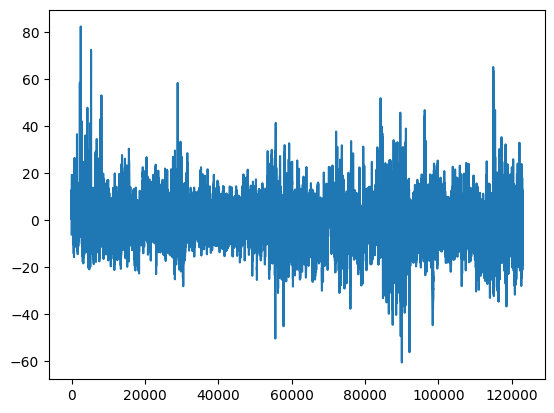

array([[<Axes: xlabel='AF1', ylabel='AF1'>]], dtype=object)

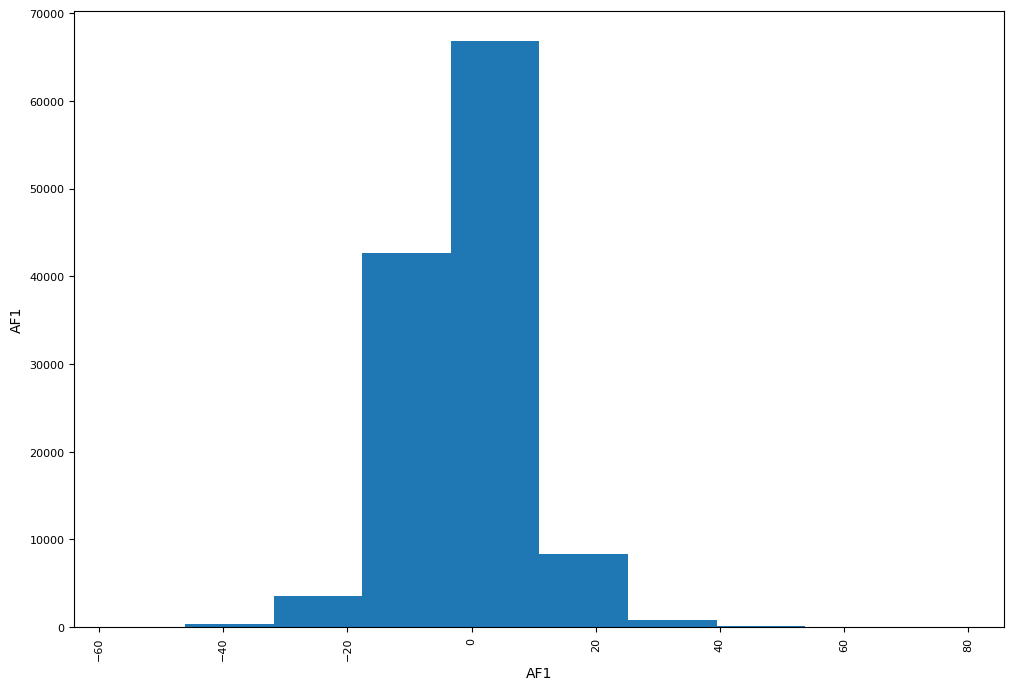

In [ ]:
from pandas.plotting import scatter_matrix
channel = "AF1"
channel_data = eeg_data[channel]
plt.plot(channel_data)
plt.show()
attributes = ["AF1"]
scatter_matrix(eeg_data[attributes], figsize=(12, 8))
